# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load and read the data

In [2]:
data = pd.read_csv('E:\jar-model\jartest_augmented1.csv')
data = data.drop(columns=['Date'])
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\j'
<>:1: SyntaxWarning: invalid escape sequence '\j'
C:\Users\HP\AppData\Local\Temp\ipykernel_23572\197773713.py:1: SyntaxWarning: invalid escape sequence '\j'
  data = pd.read_csv('E:\jar-model\jartest_augmented1.csv')


,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [3]:
# Drop rows with missing target values
data = data.dropna(subset=['Turbidity', 'PH', 'Colour'])
data.head()

,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [4]:
# Remove outliers using IQR-based filtering
def remove_outliers_iqr(df, cols, factor=1.5):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df[cols] < (Q1 - factor * IQR)) | (df[cols] > (Q3 + factor * IQR))).any(axis=1)
    return df.loc[mask]

# Apply outlier removal on all predictors and targets
cols = ['Raw_Turbidity','Raw_PH','Raw_Colour','PAC','KMnO4','ACD','Turbidity','PH','Colour']
data = remove_outliers_iqr(data, cols)
print(f"Data shape after outlier removal: {data.shape}")
data.head()

Data shape after outlier removal: (7761, 9)


,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [5]:
X_turbidity = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_ph = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_colour = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
y_turbidity = data['Turbidity']
y_ph = data['PH']
y_colour = data['Colour']

# Model development

## Turbidiy

In [6]:
X_turbidity_train, X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)

In [7]:
# Initialize RandomForest model for Turbidity
evaluate_model = None  # placeholder to preserve context if any
model_turbidity = RandomForestRegressor(n_estimators=100, random_state=42)
model_turbidity.fit(X_turbidity_train, y_turbidity_train)

RandomForestRegressor(random_state=42)

## PH

In [8]:
X_ph_train, X_ph_test, y_ph_train, y_ph_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)

In [9]:
model_ph =  RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features="sqrt",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [10]:
model_ph.fit(X_ph_train, y_ph_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=200, random_state=42)

## Colour

In [11]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)

In [12]:
model_colour = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [13]:
model_colour.fit(X_colour_train, y_colour_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300,
                      random_state=42)

# Model Testing & Validation

In [14]:
y_turbidity_pred = model_turbidity.predict(X_turbidity_test)
y_turbidity_pred

array([23.12449847,  2.39742187, 10.93194444, ...,  4.82922439,
       14.24072872, 19.16441467], shape=(1553,))

In [15]:
results_Tur = pd.DataFrame({
    'Actual': y_turbidity_test.flatten() if hasattr(y_turbidity_test, 'flatten') else y_turbidity_test,
    'Predicted': y_turbidity_pred.flatten() if hasattr(y_turbidity_pred, 'flatten') else y_turbidity_pred
})


results_Tur

,Actual,Predicted
1711,31.800000,23.124498
3828,1.710000,2.397422
2672,9.600000,10.931944
3524,5.550000,6.792447
3258,8.700000,10.074036
...,...,...
1910,13.600000,15.235647
9573,12.412499,9.209886
4163,1.920000,4.829224
7718,12.228615,14.240729


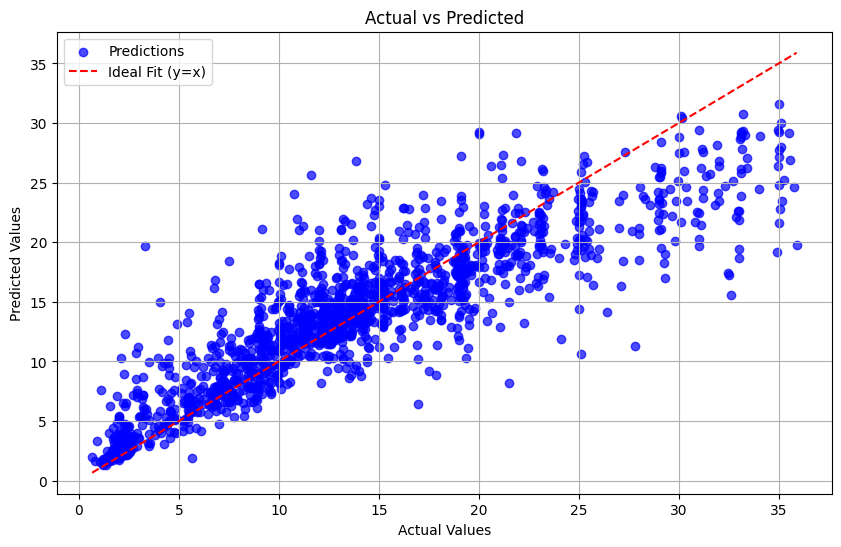

In [16]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Tur['Actual'], results_Tur['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Tur['Actual'].min(), results_Tur['Predicted'].min())
max_val = max(results_Tur['Actual'].max(), results_Tur['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [17]:
y_ph_pred = model_ph.predict(X_ph_test)
y_ph_pred

array([6.41630744, 7.5569515 , 7.15224236, ..., 7.38535221, 6.8992637 ,
       7.01571157], shape=(1553,))

In [18]:
results_Ph = pd.DataFrame({
    'Actual': y_ph_test.flatten() if hasattr(y_ph_test, 'flatten') else y_ph_test,
    'Predicted': y_ph_pred.flatten() if hasattr(y_ph_pred, 'flatten') else y_ph_pred
})

results_Ph

,Actual,Predicted
1711,6.430000,6.416307
3828,7.530000,7.556952
2672,7.260000,7.152242
3524,7.550000,7.536893
3258,7.200000,7.314267
...,...,...
1910,6.960000,6.944197
9573,7.376585,7.390082
4163,7.460000,7.385352
7718,6.900405,6.899264


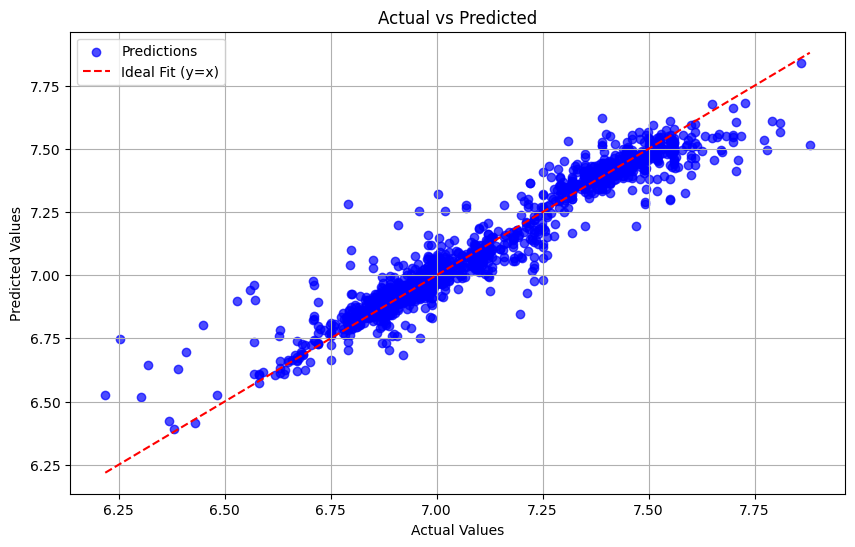

In [19]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Ph['Actual'], results_Ph['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Ph['Actual'].min(), results_Ph['Predicted'].min())
max_val = max(results_Ph['Actual'].max(), results_Ph['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [20]:
y_colour_pred = model_colour.predict(X_colour_test)
y_colour_pred

array([27.46816309, 11.53084662, 29.19143599, ..., 13.68915296,
       28.776102  , 21.7506531 ], shape=(1553,))

In [21]:
results_Colo = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})

results_Colo

,Actual,Predicted
1711,39.000000,27.468163
3828,15.000000,11.530847
2672,28.000000,29.191436
3524,12.000000,13.662887
3258,17.000000,14.652362
...,...,...
1910,32.000000,29.710480
9573,38.637380,31.049804
4163,12.000000,13.689153
7718,20.974236,28.776102


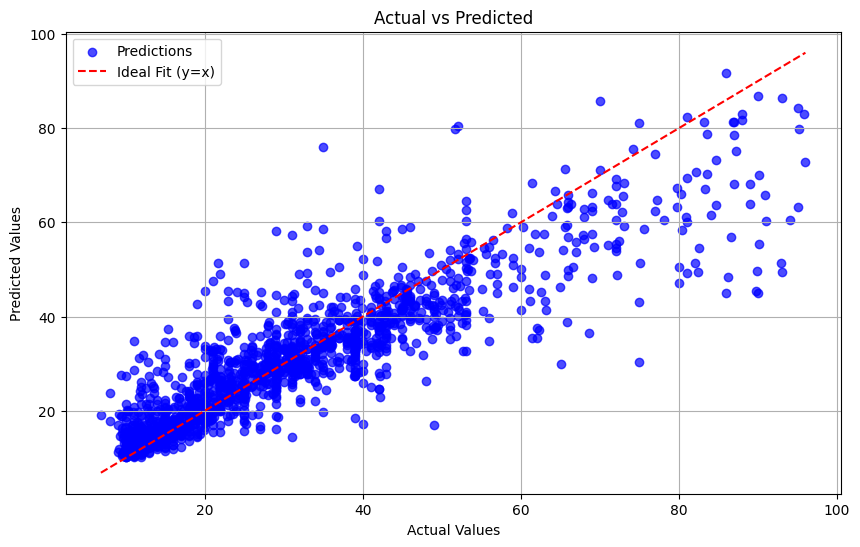

In [22]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Colo['Actual'], results_Colo['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Colo['Actual'].min(), results_Colo['Predicted'].min())
max_val = max(results_Colo['Actual'].max(), results_Colo['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, target_name):
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² to percentage
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2:.2f}")


evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")



Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 2.64
R-squared (R²): 0.76

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.04
R-squared (R²): 0.93

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 5.58
R-squared (R²): 0.78


In [24]:
# Remove outliers using IQR-based filtering
def remove_outliers_iqr(df, cols, factor=1.0):
     Q1 = df[cols].quantile(0.25)
     Q3 = df[cols].quantile(0.75)
     IQR = Q3 - Q1
     mask = ~((df[cols] < (Q1 - factor * IQR)) | (df[cols] > (Q3 + factor * IQR))).any(axis=1)
     return df.loc[mask]

# Improve model accuracy via hyperparameter tuning for Turbidity
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
search_turb = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42
)
search_turb.fit(X_turbidity_train, y_turbidity_train)
model_turbidity = search_turb.best_estimator_
print('Best params for Turbidity:', search_turb.best_params_)

# Retrain and evaluate
model_turbidity.fit(X_turbidity_train, y_turbidity_train)
y_turbidity_pred = model_turbidity.predict(X_turbidity_test)
evaluate_model(y_turbidity_test, y_turbidity_pred, 'Turbidity')

# Repeat similar tuning for PH and Colour targets
# Improve model accuracy via hyperparameter tuning for PH
param_dist_ph = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
search_ph = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist_ph,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42
)
search_ph.fit(X_ph_train, y_ph_train)
model_ph = search_ph.best_estimator_
print('Best params for PH:', search_ph.best_params_)

# Retrain and evaluate
model_ph.fit(X_ph_train, y_ph_train)
y_ph_pred = model_ph.predict(X_ph_test)
evaluate_model(y_ph_test, y_ph_pred, 'PH')

# Improve model accuracy via hyperparameter tuning for Colour
param_dist_colour = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
search_colour = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist_colour,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42
)
search_colour.fit(X_colour_train, y_colour_train)
model_colour = search_colour.best_estimator_
print('Best params for Colour:', search_colour.best_params_)

# Retrain and evaluate
model_colour.fit(X_colour_train, y_colour_train)
y_colour_pred = model_colour.predict(X_colour_test)
evaluate_model(y_colour_test, y_colour_pred, 'Colour')

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\HP\AppData\Roaming\Python\Python313\s

Best params for Turbidity: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}

Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 2.94
R-squared (R²): 0.72

Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 2.94
R-squared (R²): 0.72


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\HP\AppData\Roaming\Python\Python313\s

Best params for PH: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.05
R-squared (R²): 0.92

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.05
R-squared (R²): 0.92


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\HP\AppData\Roaming\Python\Python313\s

Best params for Colour: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 6.70
R-squared (R²): 0.72

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 6.70
R-squared (R²): 0.72
